In [48]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

In [49]:
# Load residual and fitted values
residuals = np.load("../output/blg-0305/residual_values.npy")
fitted = np.load("../output/blg-0305/fitted_values.npy")
sigF = np.load("../output/blg-0305/sigF.npy")

# Normalize residuals
residuals = residuals/np.std(residuals)

/home/fran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 0.0100224 ,  0.0150336 ,  0.07015682,  0.17539204,  0.32071687,
         0.43597449,  0.30067206,  0.19543684,  0.04008961,  0.0200448 ]),
 array([-3.41892867, -2.78743196, -2.15593526, -1.52443856, -0.89294185,
        -0.26144515,  0.37005155,  1.00154826,  1.63304496,  2.26454166,
         2.89603837]),
 <a list of 10 Patch objects>)

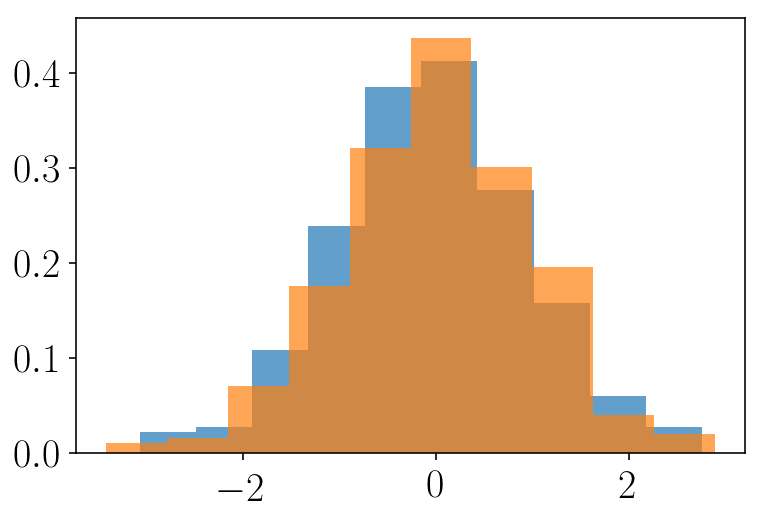

In [55]:
fig, ax = plt.subplots()

modeled_residuals = lambda: np.random.multivariate_normal(np.zeros(len(sigF)), cov=np.diag(np.ones(len(sigF))))

# ax.scatter(fitted, residuals)
ax.hist(residuals, normed=True, alpha=0.7)
ax.hist(modeled_residuals(), normed=True, color='C1', alpha=0.7)

Text(0,0.5,'Measured residuals')

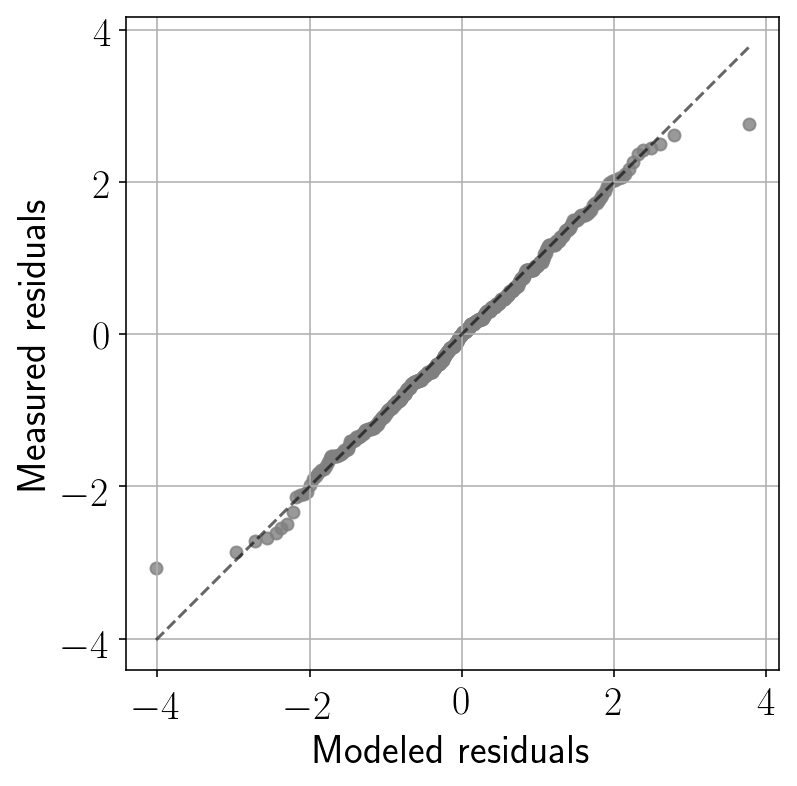

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

percentiles = np.linspace(0, 100, 500)
quantile_residuals = np.percentile(residuals, percentiles)
quantile_model = np.percentile(np.concatenate([modeled_residuals() for i in range(50)]), 
                               percentiles)

ax.scatter(quantile_model, quantile_residuals, marker='o', color='grey', alpha=0.8)
ax.grid()
x = np.linspace(quantile_model[0], quantile_model[-1])
ax.plot(x, x, color='black', linestyle='dashed', alpha=0.6)
ax.set_aspect(1)
# ax.set_xlim(-1.5, 1.5)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Modeled residuals")
ax.set_ylabel("Measured residuals")